In [35]:
import os, sys
CURR_DIR = os.path.dirname(os.path.realpath("./"))

import torch
from torchview import draw_graph

sys.path.append("../../../")
from proxy_apps.apps.pt.models.cnn1d import PTCNN
from proxy_apps.apps.pt.models.lstm import LSTMSingleLayerPT
from proxy_apps.apps.pt.models.stgcn import STGCN_WAVE

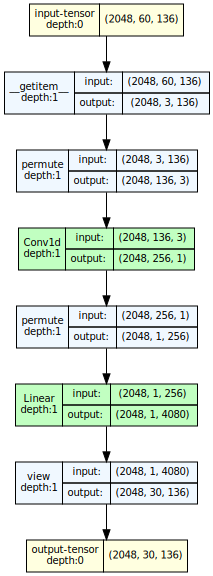

In [41]:
bw_size = 60
fw_size = 30
batch_size = 2048
n_features = 136

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

pt_model = PTCNN(
    "pt_cnn",
    {
        "bw_size": bw_size,
        "fw_size": fw_size,
        "n_features": n_features
    },
    device=device
)
model_graph = draw_graph(
    pt_model, 
    input_size=(batch_size, 60, 136), 
    device=device,
    save_graph=True,
    filename="pt_cnn",
    directory="/home/milanjain91/output/ProxyTSPRD_IPDPS/"
)
model_graph.visual_graph

cpu


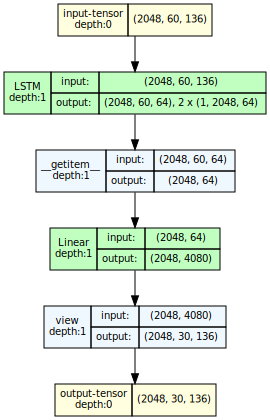

In [42]:
pt_model = LSTMSingleLayerPT(
    "pt_lstm",
    {
        "bw_size": bw_size,
        "fw_size": fw_size,
        "n_features": n_features
    },
    device=device
)
model_graph = draw_graph(
    pt_model, input_size=(batch_size, 60, 136), device=device,
    roll=False, expand_nested=True,
    save_graph=True,
    filename="pt_lstm",
    directory="/home/milanjain91/output/ProxyTSPRD_IPDPS/"
)
model_graph.visual_graph

In [49]:
pt_model = STGCN_WAVE(
    bw_size= bw_size,
    fw_size= fw_size,
    c= [2, 16, 32, 64],
    device=device
)

from scipy.sparse import random, coo_matrix, triu
import pandas as pd
import dgl

df_distance = pd.read_csv("/home/milanjain91/ProxyTSPRD/scripts/playground/models/graph/grid_graph.csv")
n_nodes = 68

sp_mx = coo_matrix(
    (df_distance["cost"].values, 
    (
        df_distance["from"].values, 
        df_distance["to"].values
    )), shape=(n_nodes, n_nodes)
)
G = dgl.from_scipy(sp_mx)
G = dgl.add_self_loop(G)

sampler = dgl.dataloading.NeighborSampler([n_nodes, n_nodes])
graphloader = dgl.dataloading.DataLoader(
    # The following arguments are specific to DataLoader.
    graph=G,  # The graph
    indices=range(n_nodes),  # The node IDs to iterate over in minibatches
    graph_sampler=sampler,  # The neighbor sampler
    device=device,  # Put the sampled MFGs on CPU or GPU
    use_ddp=False,  # Make it work with distributed data parallel
    # The following arguments are inherited from PyTorch DataLoader.
    batch_size=n_nodes,  # Per-device batch size.
    # The effective batch size is this number times the number of GPUs.
    shuffle=False,  # Whether to shuffle the nodes for every epoch
    drop_last=False,  # Whether to drop the last incomplete batch
    num_workers=0,  # Number of sampler processes
)

for input_nodes, output_nodes, mfgs in graphloader:
    pass

print("Graph Loaded")
model_graph = draw_graph(
    pt_model, 
    input_size=(1, 2, 60, 68), 
    device=device, 
    save_graph=True, 
    filename="pt_stgcn",
    directory="/home/milanjain91/output/ProxyTSPRD_IPDPS/",expand_nested=True,
    roll=True,
    g=mfgs
)
model_graph.visual_graph

SyntaxError: invalid syntax. Perhaps you forgot a comma? (1097258832.py, line 51)